## Import Libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns

In [2]:
Data = pd.read_csv('fifa21_RawData.csv')
df = Data.copy()

In [3]:
df.shape

(18979, 77)

In [4]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [5]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

### Categorised the data into Five
1. Personal Info
2. Contract and Wages
3. Pitch Abilities
4. Goalkeeping Abilities
5. Stats

#### Personal Info

In [6]:
PersonalInfo = df[['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age','Height', 'Weight','Preferred Foot','↓OVA','POT','BOV', 'Best Position']]

In [7]:
def ConvertHeight(x):
    if 'cm' in x:
        a = x.strip('cm')
        return a
    else:
        feet,inches = x.split("\'")
        cm = 30.48*int(feet) + 2.54*int(inches.strip('"'))
        return cm
PersonalInfo['Height'] = PersonalInfo['Height'].apply(ConvertHeight)

In [8]:
def ConvertWeight(x):
    if 'kg' in x:
        a = x.strip('kg')
        return a
    else:
        kg = int(x.strip('lbs'))*0.453592
        return kg
PersonalInfo['Weight'] = PersonalInfo['Weight'].apply(ConvertWeight)

In [9]:
PersonalInfo.rename(columns={'Weight':'Weight(kg)','Height':'Height(cm)'})

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,Height(cm),Weight(kg),Preferred Foot,↓OVA,POT,BOV,Best Position
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,170,72,Left,93,93,93,RW
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,187,83,Right,92,92,92,ST
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,188,87,Right,91,93,91,GK
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,181,70,Right,91,91,91,CAM
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,175,68,Right,91,91,91,LW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,178,66,Right,47,55,49,CB
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,175,65,Right,47,67,51,CAM
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,179,74,Right,47,65,49,CAM
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,175,69,Right,47,57,48,ST


In [10]:
PersonalInfo.drop( ['photoUrl', 'playerUrl'],axis=1,inplace=True)

In [11]:
PersonalInfo.rename(columns={'Height':'Height(cm)','Weight':'Weight(kg)','↓OVA':'Overall'},inplace=True)
PersonalInfo=PersonalInfo.astype({'Height(cm)':float,'Weight(kg)':float})

#### Contract and Wages

In [12]:
ContractsAndWages = df[['Joined', 'Loan Date End','Contract','Value', 'Wage', 'Release Clause']]

In [13]:
ContractsAndWages.isna().sum()

Joined                0
Loan Date End     17966
Contract              0
Value                 0
Wage                  0
Release Clause        0
dtype: int64

In [14]:
OnLoan = []
for i in ContractsAndWages['Loan Date End']:
    if i is np.nan:
        OnLoan.append('No')
    else:
        OnLoan.append('Yes')
ContractsAndWages['OnLoan'] = OnLoan

In [15]:
def ConvertCareerK(value):
    a = value.strip('€')
    if 'M' in a:
        return float(a.strip('M'))*1000
    elif 'K' in a:
        return float(a.strip('K'))
ContractsAndWages['Value'] = ContractsAndWages['Value'].apply(ConvertCareerK)

In [16]:
ContractsAndWages['Release Clause'] = ContractsAndWages['Release Clause'].apply(ConvertCareerK)

In [17]:
def ConvertWages(wage):
    a = wage.strip('€')
    if 'K' in a:
        return int(a.strip('K'))*1000
    else:
        return int(a)
ContractsAndWages['Wage'] = ContractsAndWages['Wage'].apply(ConvertWages)

In [18]:
def ContractDuration(contract):
    if 'On Loan' in contract:
        x  = contract.strip('On Loan')
        begin = pd.to_datetime(x).year
        end = np.nan
        duration = np.nan
    elif 'Free' in contract:
        begin = np.nan
        end = np.nan
        duration = np.nan
    else:
        begin,end = contract.split(" ~ ")
        duration = int(end) - int(begin)
    return begin,end,duration
ContractsAndWages[['Start_Contract','End_Contract','Contract_Duration']] = ContractsAndWages['Contract'].apply(lambda x: pd.Series(ContractDuration(x)))

In [19]:
ContractsAndWages.drop(['Joined','Loan Date End','Contract'],axis=1,inplace=True)
ContractsAndWages.rename(columns={'Value':'Value(EuroK)','Wage':'Wage(EuroK)','Release Clause':'Release_Clause(EuroK)'},inplace=True)

In [20]:
ContractsAndWages['Contract_Duration'].unique()

array([17.,  4.,  9.,  8.,  5.,  6.,  7., 10., 12., 13., 16., 14., 15.,
        2., 11.,  3.,  1., nan, 20.,  0., 18., 21., 19., 23.])

In [21]:
ContractsAndWages.isna().sum()

Value(EuroK)              248
Wage(EuroK)                 0
Release_Clause(EuroK)    1261
OnLoan                      0
Start_Contract            237
End_Contract             1250
Contract_Duration        1250
dtype: int64

In [22]:
ContractsAndWages.shape

(18979, 7)

#### Pitch Abilities

In [23]:
Pitch_Abilities = df[['Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle']]
Pitch_Abilities

,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle
0,429,85,95,70,91,88,470,96,93,94,...,44,40,93,95,75,96,91,32,35,24
1,437,84,95,90,82,86,414,88,81,76,...,63,29,95,82,84,95,84,28,32,24
2,95,13,11,15,43,13,109,12,13,14,...,34,19,11,65,11,68,57,27,12,18
3,407,94,82,55,94,82,441,88,85,83,...,76,66,88,94,84,91,186,68,65,53
4,408,85,87,62,87,87,448,95,88,89,...,51,36,87,90,92,93,94,35,30,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,145,23,26,43,26,27,142,27,23,21,...,48,50,28,28,38,44,147,45,52,50
18975,211,38,42,40,56,35,219,46,40,35,...,40,23,47,47,36,38,116,32,44,40
18976,200,30,34,43,54,39,207,43,39,31,...,56,42,47,43,42,43,121,33,43,45
18977,215,45,52,34,42,42,194,51,35,31,...,31,25,42,46,46,45,100,26,32,42


#### GoalKeeping

In [24]:
GoalKeeping = df[['Goalkeeping', 'GK Diving', 'GK Handling','GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats']]
GoalKeeping

,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats
0,54,6,11,15,14,8,2231
1,58,7,11,15,14,11,2221
2,437,87,92,78,90,90,1413
3,56,15,13,5,10,13,2304
4,59,9,9,15,15,11,2175
...,...,...,...,...,...,...,...
18974,45,7,8,5,14,11,1186
18975,45,12,10,9,6,8,1315
18976,48,13,12,6,6,11,1338
18977,55,14,12,9,8,12,1243


#### Stats

In [25]:
Stats = df[['W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS','DRI', 'DEF', 'PHY', 'Hits']]

In [26]:
def StripStar(star):
    return star.strip('★')
stars = ['W/F', 'SM','IR']
for i in stars:
    Stats[i] =  Stats[i].apply(StripStar)

In [27]:
def LabelEncode(x):
    if x == 'Low':
        return 1
    elif x == 'Medium':
        return 2
    else:
        return 3
for i in ['A/W','D/W']:
    Stats[i]=Stats[i].apply(LabelEncode)

In [28]:
Stats=Stats.astype({'W/F':int,'SM':int,'IR':int})

In [29]:
Stats['Hits'].fillna(0,inplace=True)

In [30]:
New_data = pd.concat([PersonalInfo,ContractsAndWages,Pitch_Abilities,GoalKeeping,Stats],axis=1)
New_data

,ID,Name,LongName,Nationality,Age,Height(cm),Weight(kg),Preferred Foot,Overall,POT,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,Argentina,33,170.0,72.0,Left,93,93,...,2,1,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,187.0,83.0,Right,92,92,...,3,1,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,Slovenia,27,188.0,87.0,Right,91,93,...,2,2,3,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,181.0,70.0,Right,91,91,...,3,3,4,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,175.0,68.0,Right,91,91,...,3,2,5,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,China PR,21,178.0,66.0,Right,47,55,...,2,2,1,64,28,26,38,48,51,0
18975,258760,B. Hough,Ben Hough,England,17,175.0,65.0,Right,47,67,...,2,2,1,64,40,48,49,35,45,0
18976,252757,R. McKinley,Ronan McKinley,England,18,179.0,74.0,Right,47,65,...,2,2,1,63,39,44,46,40,53,0
18977,243790,Wang Zhen'ao,Zhen'ao Wang,China PR,20,175.0,69.0,Right,47,57,...,2,2,1,58,49,41,49,30,44,0


#### Players that falls above 75% of the Value(EuroK) and also falls below 25% Wages(EuroK)

In [38]:
New_data[['Value(EuroK)','Wage(EuroK)']].describe()

,Value(EuroK),Wage(EuroK)
count,18731.000000,18979.000000
mean,2902.996583,9092.062279
std,7728.744659,19707.021089
min,9.000000,0.000000
25%,475.000000,1000.000000
50%,975.000000,3000.000000
75%,2000.000000,8000.000000
max,185500.000000,560000.000000


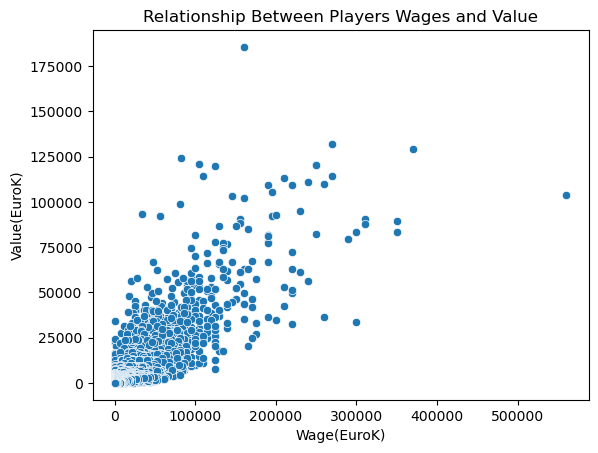

In [63]:
sns.scatterplot('Wage(EuroK)','Value(EuroK)',data=New_data)
plt.title('Relationship Between Players Wages and Value')
plt.show()

In [65]:
df1 = New_data[(New_data['Wage(EuroK)']<1000.000000) & (New_data['Value(EuroK)']>2000.000000)]

In [68]:
list(df1['Name'])

['D. Livaković',
 'O. Kolář',
 'Y. El Arabi',
 'A. Ademi',
 'V. Mykolenko',
 'M. Oršić',
 'T. Kędziora',
 'S. Sydorchuk',
 'D. Boyko',
 'S. Fernández',
 'Tete',
 'P. Olayinka',
 'F. Sánchez',
 'T. Hlatshwayo',
 'S. Dioudis',
 'D. Garmash',
 'R. Řezník',
 'C. Domínguez',
 'L. Kalvach',
 'I. Traoré',
 'J. Brabec',
 'A. Hložek',
 'S. Kryvtsov',
 'D. Hovorka',
 'K. Théophile-Catherine',
 'M. Burda',
 'M. Heča',
 'V. Buyalskyi',
 'V. Shepelev',
 'Rúben Vinagre',
 'M. Sáček',
 'F. Niță',
 'M. Solomon',
 'Alan Patrick',
 'A. Ba Loua',
 'P. Bucha',
 'A. Čermák',
 'V. Kovalenko',
 'C. de Pena',
 'D. Kourmpelis',
 'D. Moberg Karlsson',
 'D. Popov',
 'M. Matvienko',
 'S. Plavšić',
 'M. Hanousek',
 'O. Dorley',
 'B. Lednev',
 'T. Holeš',
 'G. González',
 'F. Macheda',
 'S. Tecl',
 'L. Provod',
 'Carlitos',
 'Douglas Augusto',
 'M. Bakakis',
 'O. Karavaev',
 'P. Musa',
 'L. Majer',
 'T. Lorch',
 'L. Faravelli',
 'B. Ocampo',
 'Paulinho',
 'Léo Jabá',
 'Marcos Antonio',
 'G. Corujo',
 'E. Insúa',
 '